#Cricket Data Analysis
####Created By Mowleen Armstrong

In [4]:
# Step 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()

Saving Seaborn_Batsman.csv to Seaborn_Batsman.csv


In [5]:
# Step 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Load the uploaded CSV file
df = pd.read_csv("Seaborn_Batsman.csv")

# Preview the data
df.head()


,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [6]:
# Check info
df.info()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


,RunsScored,BallsFaced,BattingPosition,Inning,Year
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,49.192308,52.961538,3.264423,1.567308,2013.240385
std,43.797641,39.850548,0.781602,0.496644,2.750477
min,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,10.750000,18.000000,3.000000,1.000000,2011.000000
50%,35.000000,46.500000,3.000000,2.000000,2013.000000
75%,81.250000,83.250000,3.000000,2.000000,2015.000000
max,183.000000,159.000000,7.000000,2.000000,2018.000000


In [8]:
df.columns = df.columns.str.strip()

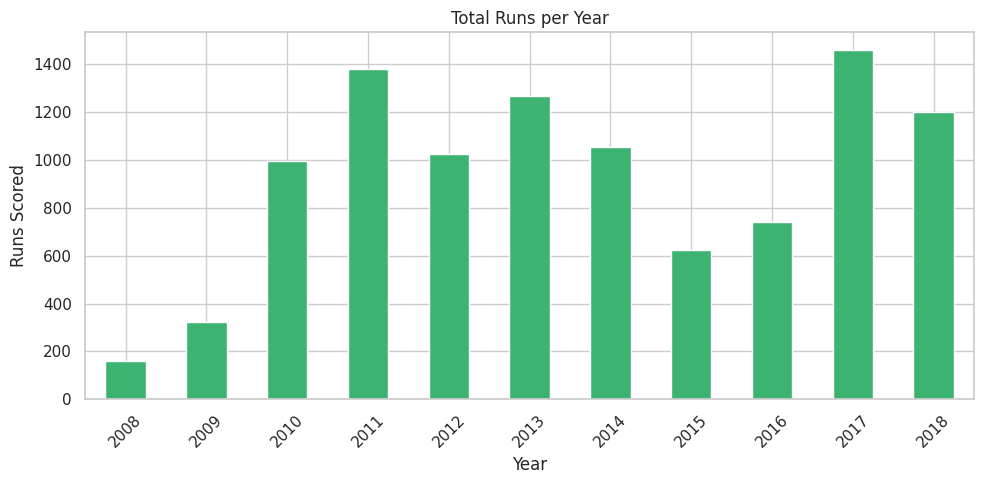

In [14]:
# Runs per Year
# Total runs scored each year
runs_per_year = df.groupby('Year')['RunsScored'].sum()

plt.figure(figsize=(10, 5))
runs_per_year.plot(kind='bar', color='mediumseagreen')
plt.title('Total Runs per Year')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

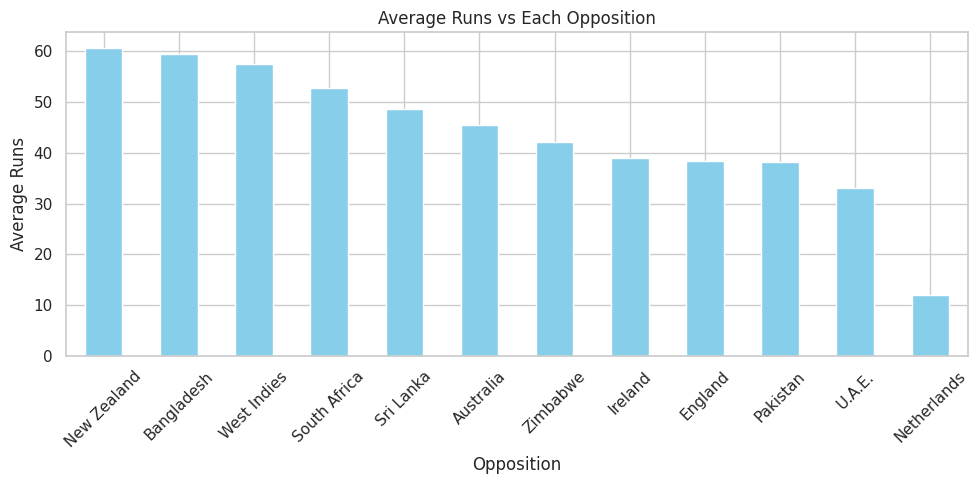

In [15]:
# Average runs against each opposition
avg_runs_opp = df.groupby('Opposition')['RunsScored'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_runs_opp.plot(kind='bar', color='skyblue')
plt.title('Average Runs vs Each Opposition')
plt.xlabel('Opposition')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

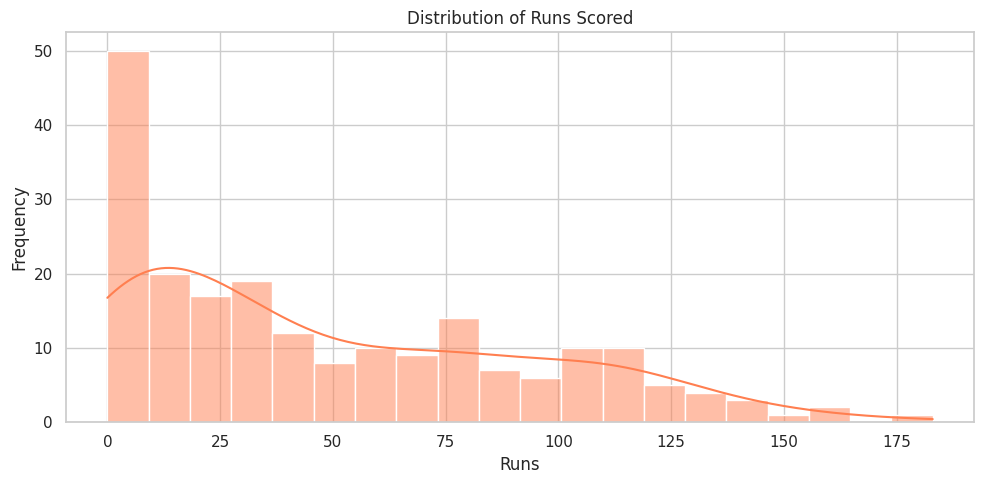

In [16]:
# Distribution of the runs
sns.histplot(df['RunsScored'], bins=20, kde=True, color='coral')
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

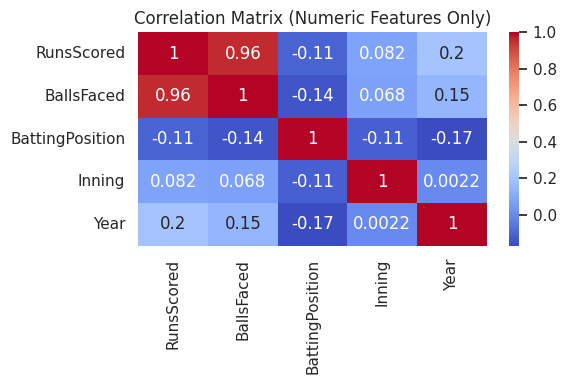

In [20]:
# Correlation
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.tight_layout()
plt.show()

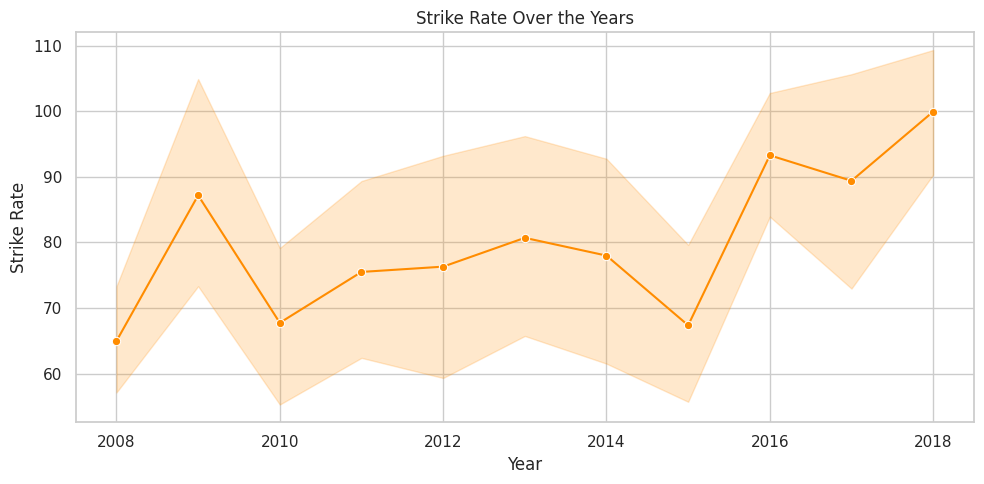

In [21]:
# Strike rate over time
df['StrikeRate'] = (df['RunsScored'] / df['BallsFaced']) * 100

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='StrikeRate', data=df, marker='o', color='darkorange')
plt.title('Strike Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Strike Rate')
plt.tight_layout()
plt.show()

<ipython-input-22-a07893e6b774>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Dismissal', palette='Set2')


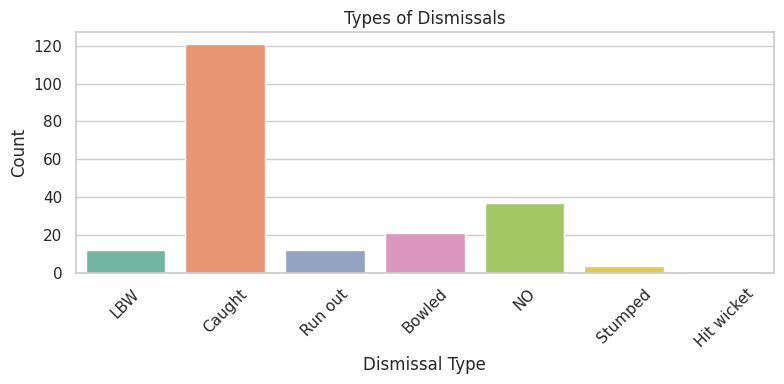

In [22]:
# Dismissal Type Count
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Dismissal', palette='Set2')
plt.title('Types of Dismissals')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

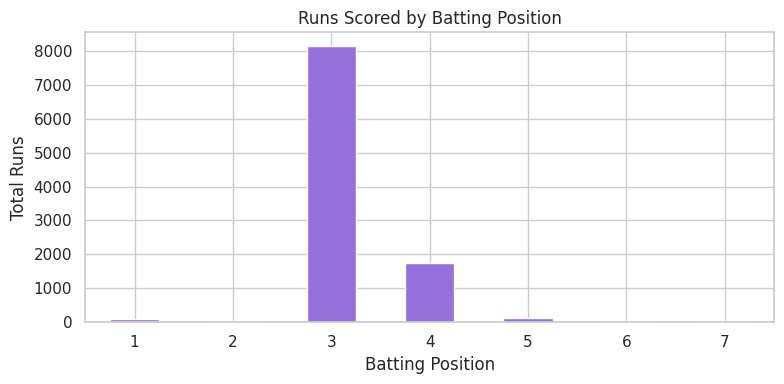

In [23]:
# Runs by Batting Position
runs_by_position = df.groupby('BattingPosition')['RunsScored'].sum()

plt.figure(figsize=(8, 4))
runs_by_position.plot(kind='bar', color='mediumpurple')
plt.title('Runs Scored by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Total Runs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

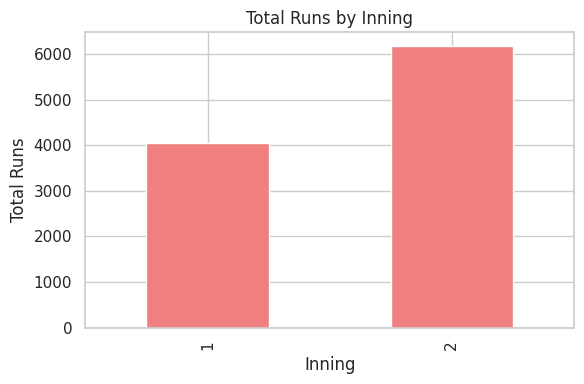

In [24]:
# Runs by Inning
runs_by_inning = df.groupby('Inning')['RunsScored'].sum()

plt.figure(figsize=(6, 4))
runs_by_inning.plot(kind='bar', color='lightcoral')
plt.title('Total Runs by Inning')
plt.xlabel('Inning')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()

<ipython-input-25-9208ee8e33f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Opposition', y='RunsScored', data=df, palette='coolwarm')


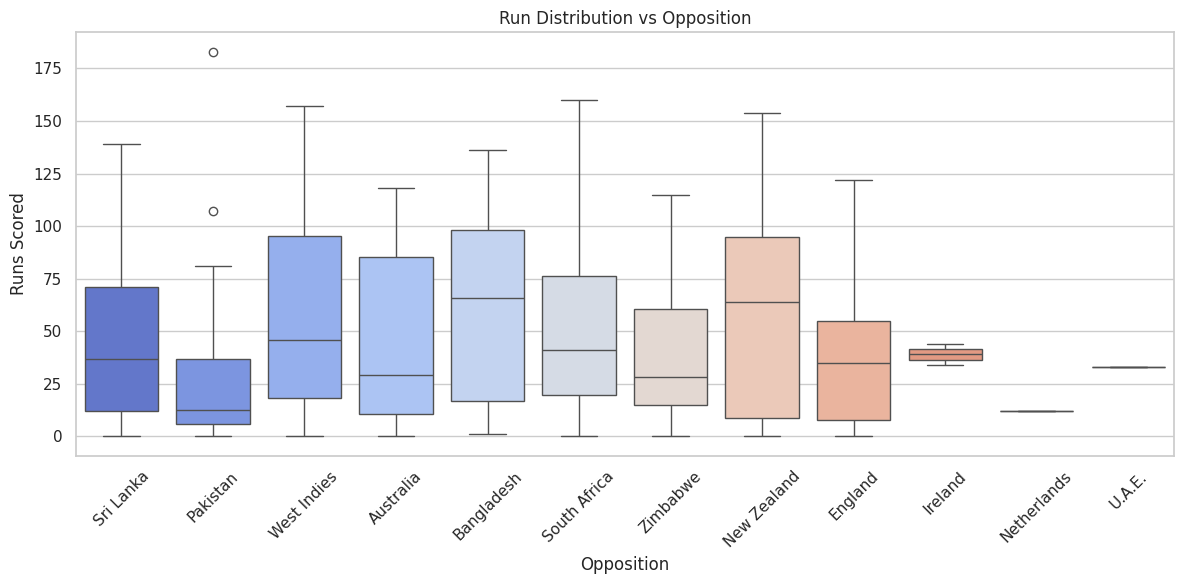

In [25]:
# Box Plot: Runs vs Opposition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Opposition', y='RunsScored', data=df, palette='coolwarm')
plt.title('Run Distribution vs Opposition')
plt.xlabel('Opposition')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

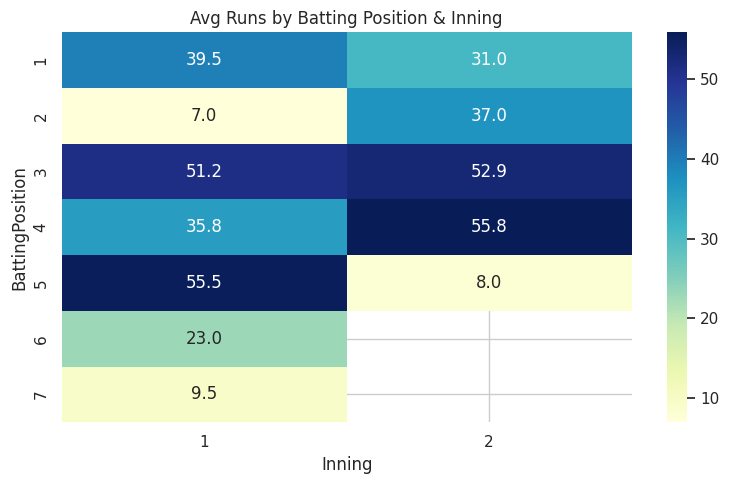

In [26]:
# Heatmap: Batting Position vs Inning (Average Runs)
heatmap_data = df.pivot_table(index='BattingPosition', columns='Inning', values='RunsScored', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Avg Runs by Batting Position & Inning')
plt.tight_layout()
plt.show()